#### 1、读入手写字体数据集（小数据集：mnist_train_100.csv）

In [4]:
data_file = open("mnist_dataset/mnist_train_100.csv", 'r')
data_list = data_file.readlines()
data_file.close()

In [2]:
len(data_list)

100

In [3]:
data_list[1]

'0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,51,159,253,159,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,48,238,252,252,252,237,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,54,227,253,252,239,233,252,57,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,60,224,252,253,252,202,84,252,253,122,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,163,252,252,252,253,252,252,96,189,253,167,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,51,238,253,253,190,114,253,228,47,79,255,168,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,48,238,252,252,179,12,75,121,21,0,0,253,243,50,0,0,0,0,0,0,0,0,0,0,0,0,0,38,165,253,233,208,84,0,0,0,0,0,0,253,252,165,0,0,0,0,0,0,0,0,0,0,0,0,7,178,252,240,71,19,28,0,0,0,0,0,0,253,252,195,0,0,0,0,0,0,0,0,0,0,0,0,57,252,252,63,0,0,0,0,0,0,0,0,0,253,252,195,0,0,0,0,0,0,0,0,0,0,0,0,198,253,190,0,0,0,0,0,0,0,0,0,0,255,253,196

##### 第一个数字是0，这是标签，其余784个数字是构成手写数字0的图像像素的颜色值，这些颜色值在[0,255]之间

#### 2、根据后784个数字绘制显示对应的手写数字

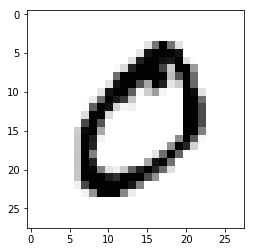

In [16]:
import numpy as np
import matplotlib.pyplot as plt

all_values = data_list[1].split(',')
#np.asfarray()函数：返回转换为float类型的数组
image_array = np.asfarray(all_values[1:]).reshape((28,28))
plt.imshow(image_array, cmap = 'Greys', interpolation = 'None')

#### 3、处理MNIST训练数据

##### 将输入颜色值从较大的0到255范围，缩放至较小的0.01到1.0范围

In [17]:
scaled_input = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
print(scaled_input)

[0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0

#### 4、构建目标矩阵

In [18]:
onodes = 10
targets = np.zeros(onodes) + 0.01
targets[int(all_values[0])] = 0.99
targets

array([0.99, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01])

### 更新后的神经网络

In [49]:
import numpy as np
import scipy.special as S
import matplotlib.pyplot as plt
class neuralNetwork:
#初始化神经网络,构造函数
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        #设置每个输入、隐藏、输出层中的节点数
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        
        #链接权重矩阵，wih和who
        # weights inside the arrays are w_i_j, where link is from node i to node j in the next layer
        # w11 w21
        # w12 w22 etc 
        self.wih = np.random.normal(0.0, pow(self.inodes, -0.5), (self.hnodes, self.inodes))
        self.who = np.random.normal(0.0, pow(self.hnodes, -0.5), (self.onodes, self.hnodes))
        
        #学习率
        self.lr = learningrate
        
        #创建激活函数（函数的另一种定义方法,这样以后可以直接调用）
        self.activation_function = lambda x: S.expit(x)
        
        pass
    
#训练神经网络
    def train(self, inputs_list, targets_list):
        #将输入列表转换成二维数组
        inputs = np.array(inputs_list, ndmin = 2).T
        targets = np.array(targets_list, ndmin = 2).T
        
        #将输入信号计算到隐藏层
        hidden_inputs = np.dot(self.wih, inputs)
        #计算隐藏层中输出的信号(使用激活函数计算)
        hidden_outputs = self.activation_function(hidden_inputs)
        #将传输的信号计算到输出层
        final_inputs = np.dot(self.who, hidden_outputs)
        #计算输出层中输出的信号（使用激活函数）
        final_outputs = self.activation_function(final_inputs)
        
        #计算输出层的误差：（target - actual）(预期目标输出值-实际计算得到的输出值)
        output_errors = targets - final_outputs
        #隐藏层的误差：是输出层误差按权重分割，在隐藏节点上重新组合
        hidden_errors = np.dot(self.who.T, output_errors)
        
        #反向传播，更新各层权重
        #更新隐层和输出层之间的权重
        self.who += self.lr*np.dot((output_errors*final_outputs*(1.0 - final_outputs)), np.transpose(hidden_outputs))
        #更新输入层和隐藏层之间的权重
        self.wih += self.lr*np.dot((hidden_errors*hidden_outputs*(1.0 - hidden_outputs)), np.transpose(inputs))
        #pass一般用于占位置，定义一个空函数程序会报错，当没有想好函数的内容可以用pass填充，使得程序正常运行
        pass
    
#查询神经网络：接受神经网络的输入，返回神经网络的输出
    def query(self, inputs_list):
        #将输入列表转换成二维数组
        inputs = np.array(inputs_list, ndmin = 2).T
        
        #将输入信号计算到隐藏层
        hidden_inputs = np.dot(self.wih, inputs)
        #将信号从隐藏层输出
        hidden_outputs = self.activation_function(hidden_inputs)
        #将信号引入到输出层
        final_inputs = np.dot(self.who, hidden_outputs)
        #将信号从输出层输出
        final_outputs = self.activation_function(final_inputs)
        
        #返回输出层的输出值
        return final_outputs

In [50]:
input_nodes = 784
hidden_nodes = 100
output_nodes = 10
learning_rate = 0.3
n = neuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)

#### 将MNIST的训练数据CSV文件加载到一个列表中

In [51]:
training_data_file = open("mnist_dataset/mnist_train_100.csv", 'r')
training_data_list = training_data_file.readlines()
training_data_file.close()

#### 训练神经网络

In [52]:
#处理手写字体数据
for record in training_data_list:
    all_values = record.split(',')
    inputs = (np.asfarray(all_values[1:]) / 255.0*0.99) + 0.01
    targets = np.zeros(output_nodes) + 0.01
    targets[int(all_values[0])] = 0.99
    n.train(inputs, targets)
    pass

#### 测试网络

In [53]:
test_data_file = open("mnist_dataset/mnist_test_10.csv", 'r')
test_data_list = test_data_file.readlines()
test_data_file.close()
all_values = test_data_list[0].split(',')
print(all_values[0])

7


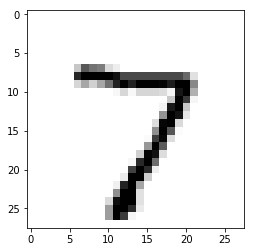

In [54]:
image_array = np.asfarray(all_values[1:]).reshape((28,28))
plt.imshow(image_array, cmap='Greys', interpolation = 'None')

In [55]:
n.query((np.asfarray(all_values[1:]) / 255.0*0.99) + 0.01)

array([[0.12782339],
       [0.09447784],
       [0.04824018],
       [0.13760838],
       [0.15729259],
       [0.04569241],
       [0.04256198],
       [0.5568421 ],
       [0.11145141],
       [0.08292764]])

### 识别参数结果和书上不一样，是因为训练出的模型具有随机性